Loading all files and changing there name to "correded","non-correded","damaged" and "non-damaged" according to the the csv file.

In [1]:
#import data
# import csv
# import os
# path = 'BGS_Images'
# with open('BGS_name.csv') as csvDataFile:
#     csvReader = csv.reader(csvDataFile)
#     i=0
#     for row in csvReader:
#         if i==0:
#             i=2
#             continue
#         filename=row[0]
#         filepath=os.path.join(path,filename)
#         all_files=os.listdir(filepath)
#         for x in all_files:
#             newfilename=x.split(".")[0]+"_"+row[1]+"_"+row[2]+"."+x.split(".")[1]
#             newfilename_path=os.path.join(filepath,newfilename)
#             oldfilename_path=os.path.join(filepath,x)
#             os.rename(oldfilename_path,newfilename_path)

Converting image to gray scale and then making np array of it.

In [1]:
# train images
import csv
import numpy as np
import cv2
import os
import glob



X_train_data = []

# dir_files ="train/"
dir_files = "train/"
dirs = os.listdir(dir_files)
for img in dirs:
        if img.endswith(".JPG"):
            img_array = cv2.imread(os.path.join(dir_files,img), cv2.IMREAD_GRAYSCALE)
            resized_image = cv2.resize(img_array, (299, 299))
    #         img_flatten = resized_image.reshape(-1)
            X_train_data.append(resized_image)
np_X_train_data = np.array(X_train_data)        
        
print(np_X_train_data.shape)

(306, 299, 299)


In [3]:
# test images
X_test_data = []
dir_files ="test/"
print(len(os.listdir(dir_files)))

for img in os.listdir(dir_files):
        img_array = cv2.imread(os.path.join(dir_files,img), cv2.IMREAD_GRAYSCALE)
        resized_image = cv2.resize(img_array, (299, 299))
#         img_flatten = resized_image.reshape(-1)
        X_test_data.append(resized_image)
np_X_test_data = np.array(X_test_data)        
        
print(np_X_test_data.shape)

120
(120, 299, 299)


creating labels for train and test images

In [4]:
from PIL import Image
import os, sys
import glob
import numpy as np

Y_train_data = []
dir_files = glob.glob("train/**.JPG")
print(len(dir_files))
for ii in dir_files:
    if ii.find('_Not Corroded_Not Damaged')!=-1:
        Y_train_data.append(2)
    elif ii.find('_Not Corroded_Damaged')!=-1:
        Y_train_data.append(1)
    elif ii.find('_Corroded_Not Damaged')!=-1:
        Y_train_data.append(3)
    elif ii.find('_Corroded_Damaged')!=-1:
        Y_train_data.append(0)

np_Y_train_data = np.array(Y_train_data) 
print(len(Y_train_data))

306
306


In [5]:
Y_test_data = []
dir_files = glob.glob("test/**.JPG")
print(len(dir_files))
for ii in dir_files:
    if ii.find('_Not Corroded_Not Damaged')!=-1:
        Y_test_data.append(2)
    elif ii.find('_Not Corroded_Damaged')!=-1:
        Y_test_data.append(1)
    elif ii.find('_Corroded_Not Damaged')!=-1:
        Y_test_data.append(3)
    elif ii.find('_Corroded_Damaged')!=-1:
        Y_test_data.append(0)

np_Y_test_data = np.array(Y_test_data) 
print(len(Y_test_data))

120
120


In [6]:
N = 75 # how much data of each class
c1, c2, c3, c4= 2, 1, 3, 0

For Training Data

In [7]:
index_of_c1 = np.argwhere(np_Y_train_data == c1).ravel() # index of 2s
index_of_c1 = np.random.choice(index_of_c1, replace=False)

index_of_c2 = np.argwhere(np_Y_train_data == c2).ravel() # index of 3s
index_of_c2 = np.random.choice(index_of_c2, replace=False)

index_of_c3 = np.argwhere(np_Y_train_data == c3).ravel() # index of 4s
index_of_c3 = np.random.choice(index_of_c3, replace=False)

index_of_c4 = np.argwhere(np_Y_train_data == c4).ravel() # index of 4s
index_of_c4 = np.random.choice(index_of_c4, N, replace=False)

x_train = np_X_train_data[np.hstack((index_of_c1, index_of_c2, index_of_c3, index_of_c4))] # subsample
y_train = np_Y_train_data[np.hstack((index_of_c1, index_of_c2, index_of_c3, index_of_c4))] # subsample

print("size of training subset: %s" % str(x_train.shape))

size of training subset: (78, 299, 299)


In [8]:
as_rgb = lambda im: np.tile(np.expand_dims(im,2),(1,1,3))

#example
print(as_rgb(x_train[0,:,:]).shape)

(299, 299, 3)


In [9]:
import skimage
resize = lambda im: skimage.transform.resize(as_rgb(im), (299, 299), preserve_range=False, order=0)

new_x_train = np.concatenate([[resize(x_train[i,:,:])] for i in range(x_train.shape[0])])
print(new_x_train.shape)

/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(78, 299, 299, 3)


For Testing Data

In [10]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [11]:
inception = InceptionV3(
    weights='imagenet',
    include_top=False,
    pooling='avg',
    input_shape=(299,299,3)
)

W0718 19:33:37.037014 4501407168 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
index_of_c1 = np.argwhere(np_Y_test_data == c1).ravel() # index of 2s
index_of_c1 = np.random.choice(index_of_c1, replace=False)

index_of_c2 = np.argwhere(np_Y_test_data == c2).ravel() # index of 3s
index_of_c2 = np.random.choice(index_of_c2, replace=False)

index_of_c3 = np.argwhere(np_Y_test_data == c3).ravel() # index of 4s
index_of_c3 = np.random.choice(index_of_c3, replace=False)

index_of_c4 = np.argwhere(np_Y_test_data == c4).ravel() # index of 4s
index_of_c4 = np.random.choice(index_of_c4, N, replace=False)

x_test = np_X_test_data[np.hstack((index_of_c1, index_of_c2, index_of_c3, index_of_c4))] # subsample
y_test = np_Y_test_data[np.hstack((index_of_c1, index_of_c2, index_of_c3, index_of_c4))] # subsample

print("size of training subset: %s" % str(x_test.shape))

size of training subset: (78, 299, 299)


In [13]:
new_x_test = np.concatenate([[resize(x_test[i,:,:])] for i in range(x_test.shape[0])])
print(new_x_test.shape)

/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(78, 299, 299, 3)


In [14]:
training_features = inception.predict(new_x_train)
print(training_features.shape)

(78, 2048)


In [15]:
test_features = inception.predict(new_x_test)
print(test_features.shape)

(78, 2048)


In [16]:
from sklearn.svm import LinearSVC as Classifier

In [17]:
clf = Classifier()

clf.fit(training_features, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [18]:
y_predict = clf.predict(test_features)

In [19]:
acc = clf.score(test_features, y_test)
print("accuracy: %f" % acc)
print("successfully classified: %d/%d" % (np.sum(y_predict == y_test), len(y_test)))

accuracy: 0.961538
successfully classified: 75/78


In [20]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

classifiers = {
    'svm': SVC, 
    'sgd': SGDClassifier, 
    'linearsvm': LinearSVC,
    'decisiontree': DecisionTreeClassifier,
    'naivebayes': GaussianNB,
    'GBC':GradientBoostingClassifier,
    'RFR':RandomForestClassifier
}

In [21]:
for name, Classifer in classifiers.items():
    clf = Classifer()
    clf.fit(training_features, y_train)
    train_acc = clf.score(training_features, y_train)
    test_acc  = clf.score(test_features,  y_test)
    print("classifer: %s\n  training accuracy: %f\n  test accuracy: %f" % (name, train_acc, test_acc))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


classifer: svm
  training accuracy: 0.961538
  test accuracy: 0.961538
classifer: sgd
  training accuracy: 1.000000
  test accuracy: 0.961538
classifer: linearsvm
  training accuracy: 1.000000
  test accuracy: 0.961538
classifer: decisiontree
  training accuracy: 1.000000
  test accuracy: 0.961538
classifer: naivebayes
  training accuracy: 1.000000
  test accuracy: 0.961538
classifer: GBC
  training accuracy: 1.000000
  test accuracy: 0.961538
classifer: RFR
  training accuracy: 0.987179
  test accuracy: 0.961538


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
from matplotlib import pyplot as plt

In [23]:
plt.figure(figsize=(299,299))
i = np.random.randint(0, new_x_train.shape[0])
plt.subplot(221)
plt.imshow(x_train[i,:,:])
plt.title("binary training image (%d) of a %d" % (i,y_train[i]))
plt.subplot(222)
plt.imshow(new_x_train[i,:,:])
plt.title("resized rbg version");

i = np.random.randint(0, new_x_test.shape[0])
plt.subplot(223)
plt.imshow(x_test[i,:,:])
plt.title("binary test image (%d) of a %d" % (i,y_test[i]))
plt.subplot(224)
plt.imshow(new_x_test[i,:,:])
plt.title("resized rbg version");

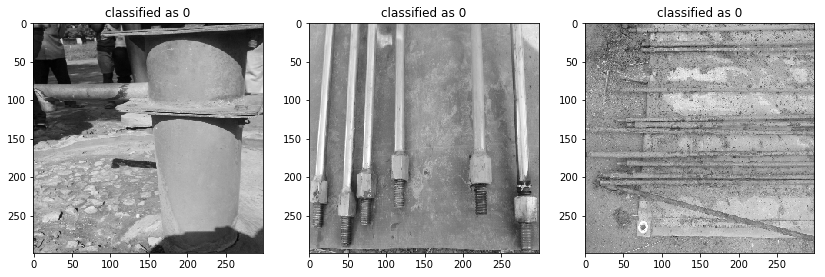

In [24]:
ix, = np.where(y_predict != y_test)

nc = min(5,len(ix))
nr = int(np.ceil(len(ix) / nc))

fig, axs = plt.subplots(nr,nc, figsize=(14,8))
axs = axs.ravel()
for k,i in enumerate(ix):
    axs[k].imshow(new_x_test[i,:,:])
    axs[k].title.set_text("classified as %d" % y_predict[i])